In [2]:
#Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
path = r'C:\Users\stefa\OneDrive\Career Foundry\Chase Bank Analysis'

In [27]:
df1 = pd.read_pickle(os.path.join(path, '02 Data', 'Original Data', 'database.pkl'))

In [46]:
df2 = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'Census.csv'))

In [47]:
df = df1.merge(df2, on = 'State')

In [48]:
df

,Institution Name,Main Office,Branch Name,Branch Number,Established Date,Acquired Date,Street Address,City,County,State,...,Latitude,Longitude,2010 Deposits,2011 Deposits,2012 Deposits,2013 Deposits,2014 Deposits,2015 Deposits,2016 Deposits,2016 Median Annual\nincome
0,JPMorgan Chase Bank,0,Avenue U and East 17th St Branch,501,1/1/1900,6/20/1992,1722 Avenue U,Brooklyn,Kings,NY,...,40.59911,-73.95374,257757.0,256109.0,269664.0,393884.0,410870.0,432799.0,480204,61437
1,JPMorgan Chase Bank,0,Broadway and 96th Street Branch,512,1/1/1900,6/20/1992,"2551 Broadway, 96th Street",New York City,New York,NY,...,40.79445,-73.97206,327054.0,336573.0,354604.0,385553.0,422699.0,441168.0,474228,61437
2,JPMorgan Chase Bank,0,Suffern Branch,3859,11/1/1901,10/1/2006,67 Lafayette Street,Suffern,Rockland,NY,...,41.11541,-74.15134,38610.0,41017.0,44148.0,50997.0,58002.0,61939.0,65483,61437
3,JPMorgan Chase Bank,0,Grand Street Branch,509,1/1/1902,6/20/1992,231 Grand Street,New York City,New York,NY,...,40.71853,-73.99513,110712.0,127369.0,161513.0,197445.0,219289.0,245988.0,281266,61437
4,JPMorgan Chase Bank,0,Ninth Street Branch,498,12/29/1902,6/20/1992,444 5th Avenue,Brooklyn,Kings,NY,...,40.66985,-73.98073,143163.0,161085.0,189245.0,205912.0,235212.0,248736.0,281082,61437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3791,JPMorgan Chase Bank,0,Atlanta Brach Branch,4408,4/1/2003,8/16/2008,"3475 Piedmont Road, Suite 1800",Atlanta,Fulton,GA,...,33.84964,-84.37680,0.0,0.0,0.0,0.0,0.0,0.0,0,53527
3792,JPMorgan Chase Bank,0,Atlanta - Skye Mill Road Branch,5534,4/1/2003,9/25/2008,3300 Clairmont Road Ne Ste C,Atlanta,DeKalb,GA,...,33.85553,-84.31256,7353.0,9506.0,11784.0,14721.0,17628.0,19531.0,24122,53527
3793,JPMorgan Chase Bank,0,Lawrenceville - Sugarloaf Branch,5538,7/14/2003,9/25/2008,3340 Sugarloaf Pkwy Ste A,Lawrenceville,Gwinnett,GA,...,33.92131,-84.01652,11031.0,13266.0,15776.0,16844.0,18553.0,21373.0,26737,53527
3794,JPMorgan Chase Bank,0,Chamblee Branch,6592,4/2/2007,9/25/2008,"1841 Chamblee Tucker Road, Suite 1-2",Chamblee,DeKalb,GA,...,33.88949,-84.31029,13559.0,13450.0,18043.0,19028.0,22416.0,25138.0,28075,53527


### Data Cleaning

In [49]:
df.shape

(3796, 21)

In [50]:
# Check for missing values

df.isnull().sum()

# No missing values to handle

Institution Name               0
Main Office                    0
Branch Name                    0
Branch Number                  0
Established Date               0
Acquired Date                  0
Street Address                 0
City                           0
County                         0
State                          0
Zipcode                        0
Latitude                      13
Longitude                     13
2010 Deposits                  0
2011 Deposits                  0
2012 Deposits                  0
2013 Deposits                  0
2014 Deposits                  0
2015 Deposits                  0
2016 Deposits                  0
2016 Median Annual\nincome     0
dtype: int64

In [51]:
df_clean = df[df['Latitude'].isnull() == False]

In [52]:
df_clean = df[df['Longitude'].isnull() == False]

In [53]:
df_clean.shape

#Cleaning rows with missing values.

(3783, 21)

In [54]:
# Check for missing values

df_clean.isnull().sum()

# No missing values to handle

Institution Name              0
Main Office                   0
Branch Name                   0
Branch Number                 0
Established Date              0
Acquired Date                 0
Street Address                0
City                          0
County                        0
State                         0
Zipcode                       0
Latitude                      0
Longitude                     0
2010 Deposits                 0
2011 Deposits                 0
2012 Deposits                 0
2013 Deposits                 0
2014 Deposits                 0
2015 Deposits                 0
2016 Deposits                 0
2016 Median Annual\nincome    0
dtype: int64

In [55]:
dups = df_clean.duplicated()

In [56]:
dups.shape # No dups

(3783,)

C:\Users\stefa\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='2016 Median Annual\nincome', ylabel='Density'>

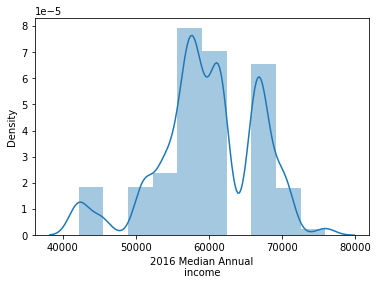

In [74]:
sns.distplot(df['2016 Median Annual\nincome'], bins=10) # Shows extreme values

# Some of the outliers in the high values may need to be removed, but let's try without doing so first.

In [58]:
df_clean.describe()

,Main Office,Branch Number,Zipcode,Latitude,Longitude,2010 Deposits,2011 Deposits,2012 Deposits,2013 Deposits,2014 Deposits,2015 Deposits,2016 Deposits,2016 Median Annual\nincome
count,3783.0,3783.000000,3783.000000,3783.000000,3783.000000,3.783000e+03,3.783000e+03,3.783000e+03,3.783000e+03,3.783000e+03,3.783000e+03,3.783000e+03,3783.000000
mean,0.0,3613.833466,59692.557494,37.669029,-95.474814,1.048512e+05,1.196051e+05,1.346443e+05,1.484495e+05,1.701096e+05,1.698780e+05,1.742533e+05,59780.507534
std,0.0,1705.500540,30232.971053,5.407150,17.479459,9.418574e+05,1.286909e+06,1.608388e+06,1.769051e+06,2.248047e+06,1.874508e+06,1.631826e+06,6860.673753
min,0.0,174.000000,2110.000000,0.000000,-124.421370,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,42196.000000
25%,0.0,2217.500000,40219.000000,33.460135,-116.457540,2.861450e+04,3.048000e+04,3.371750e+04,3.659500e+04,3.973500e+04,4.367100e+04,4.806850e+04,56564.000000
50%,0.0,3347.000000,60714.000000,39.705560,-89.028710,4.952600e+04,5.182200e+04,5.771200e+04,6.231200e+04,6.802900e+04,7.366800e+04,8.124800e+04,59817.000000
75%,0.0,5035.500000,90003.000000,41.342325,-81.637720,9.071850e+04,9.479550e+04,1.024945e+05,1.104215e+05,1.187415e+05,1.274145e+05,1.408410e+05,66637.000000
max,0.0,6880.000000,99362.000000,48.801330,0.000000,4.509908e+07,6.263098e+07,8.196038e+07,8.517781e+07,9.832216e+07,8.456904e+07,6.904479e+07,75923.000000


In [82]:
df_clean.rename(columns = {'2016 Median Annual\nincome' : '2016 Median Annual Income'}, inplace = True)

### Data prep for regression analysis 

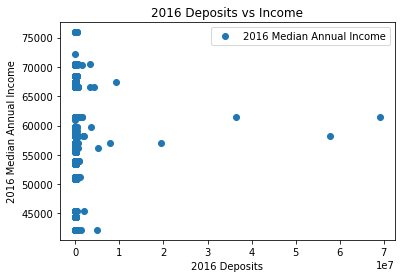

In [84]:
# Creating a scatterplot to test variable relationships

df_clean.plot(x = '2016 Deposits', y = '2016 Median Annual Income',style='o')
plt.title('2016 Deposits vs Income')  
plt.xlabel('2016 Deposits')  
plt.ylabel('2016 Median Annual Income')  
plt.show()

### Hypothesis

In [17]:
#Hypothesis: Banks will have a growth where there is a growing population density.

### Reshaping variables

In [86]:
X = df_clean['2016 Deposits'].values.reshape(-1,1)
y = df_clean['2016 Median Annual Income'].values.reshape(-1,1)

In [87]:
X

array([[480204],
       [474228],
       [ 65483],
       ...,
       [ 26737],
       [ 28075],
       [     0]], dtype=int64)

In [88]:
y

array([[61437],
       [61437],
       [61437],
       ...,
       [53527],
       [53527],
       [72266]], dtype=int64)

### Splitting the data into training and test set

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### Regression Analysis

In [90]:
regression = LinearRegression()

In [91]:
regression.fit(X_train, y_train)

LinearRegression()

In [92]:
y_predicted = regression.predict(X_test)

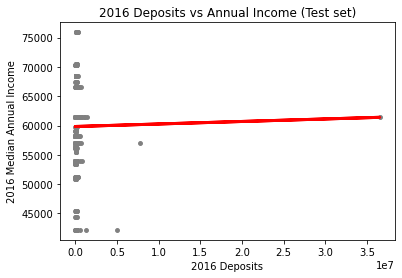

In [94]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('2016 Deposits vs Annual Income (Test set)')
plot_test.xlabel('2016 Deposits')
plot_test.ylabel('2016 Median Annual Income')
plot_test.show()

Unfortunately the regression line seems to show a negative trend almost at zero, so there is not much correlation between the 2.

### Model Performance Statistics

In [95]:
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [96]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[4.29351865e-05]]
Mean squared error:  47360252.79922823
R2 score:  -0.0009615938930340739


### Comparing predicted and actual y-values

In [97]:
y_predicted

array([[59843.07519917],
       [59840.80865068],
       [59846.80562285],
       ...,
       [59841.03255768],
       [59845.69888255],
       [59841.42343961]])

In [98]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,53985,59843.075199
1,53985,59840.808651
2,66637,59846.805623
3,66637,59848.174482
4,50943,59839.719170
5,66637,59842.920633
6,61386,59841.895469
7,58146,59839.719170
8,57091,59844.906299
9,61437,59845.580596


According to our R2 score we can see that there is indeed very little correlation. We must continue to investigate other correlations.

### Removing Outliers

In [104]:
df_sample = df_clean[df_clean['2016 Deposits'] <=3500000] 

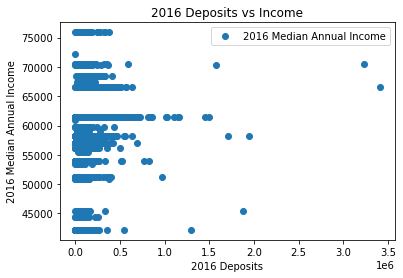

In [105]:
df_sample.plot(x = '2016 Deposits', y = '2016 Median Annual Income',style='o')
plt.title('2016 Deposits vs Income')  
plt.xlabel('2016 Deposits')  
plt.ylabel('2016 Median Annual Income')  
plt.show()

Unfortunately, there is not much of a pattern to make a conclusive answer.

In [107]:
df_clean.to_csv(os.path.join(path, '02 Data','Prepared Data', 'Database.csv'))